In [1]:
from google.colab import files

# Upload your two files here
uploaded = files.upload()


Saving Ops Case Study Dataset - Sample EHR Data (2).csv to Ops Case Study Dataset - Sample EHR Data (2).csv
Saving Ops Case Study Dataset - Sample DB Data (2).csv to Ops Case Study Dataset - Sample DB Data (2).csv


In [3]:
import pandas as pd

ehr_df = pd.read_csv("Ops Case Study Dataset - Sample EHR Data (2).csv", parse_dates=["Date of Service"])
db_df = pd.read_csv("Ops Case Study Dataset - Sample DB Data (2).csv", parse_dates=["from_date_range"])


In [4]:
print("EHR Data (from client system):")
display(ehr_df.head())

print("DB Data (Imported encounters):")
display(db_df.head())

EHR Data (from client system):


,Patient Name,Provider Name,Date of Service,CPT Code,Unique ID
0,Ava Johnson,Liam Young,2024-09-24,97010,ava johnson|2024-09-24|liam young
1,Ava Johnson,Liam Young,2024-09-24,97140,ava johnson|2024-09-24|liam young
2,Sophia King,Sebastian Miller,2024-07-03,97140,sophia king|2024-07-03|sebastian miller
3,Carter Brown,Charlotte Williams,2024-09-09,97014,carter brown|2024-09-09|charlotte williams
4,Olivia Davis,Noah Lee,2024-09-09,97140,olivia davis|2024-09-09|noah lee


DB Data (Imported encounters):


,Patient Name,Provider Name,from_date_range,cpt_codes
0,Lucas Smith,Aiden King,2024-07-03,"{97110,97112,97140,97010}"
1,Lucas Smith,Charlotte Williams,2024-07-11,"{97112,97010,97140,97110}"
2,Lucas Smith,Charlotte Williams,2024-07-17,"{97110,97140,97112,97010}"
3,Lucas Smith,Julian Lee,2024-07-27,"{97140,97110,97112,97010}"
4,Lucas Smith,Aiden King,2024-08-07,"{97010,97110,97112,97140}"


In [5]:
#checking basic info
print("EHR Data Info:")
ehr_df.info()

print("DB Data Info:")
db_df.info()

EHR Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25956 entries, 0 to 25955
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Patient Name     25956 non-null  object        
 1   Provider Name    25954 non-null  object        
 2   Date of Service  25954 non-null  datetime64[ns]
 3   CPT Code         25954 non-null  object        
 4   Unique ID        25956 non-null  object        
dtypes: datetime64[ns](1), object(4)
memory usage: 1014.0+ KB
DB Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6482 entries, 0 to 6481
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Patient Name     6482 non-null   object        
 1   Provider Name    6482 non-null   object        
 2   from_date_range  6482 non-null   datetime64[ns]
 3   cpt_codes        6482 non-null   object        
dtypes

**Create Matching Columns & Find Missing Encounters**

In [6]:
# Step 1: Create 'unique_id' column in both DataFrames for comparison
ehr_df["unique_id"] = ehr_df["Patient Name"].str.lower().str.strip() + "|" + \
                      ehr_df["Date of Service"].dt.strftime("%Y-%m-%d") + "|" + \
                      ehr_df["Provider Name"].str.lower().str.strip()

db_df["unique_id"] = db_df["Patient Name"].str.lower().str.strip() + "|" + \
                     db_df["from_date_range"].dt.strftime("%Y-%m-%d") + "|" + \
                     db_df["Provider Name"].str.lower().str.strip()

# Step 2: Get unique encounter IDs from both datasets
ehr_unique_ids = set(ehr_df["unique_id"].unique())
db_unique_ids = set(db_df["unique_id"].unique())

# Step 3: Find missing encounters (in EHR but not in DB)
missing_encounter_ids = ehr_unique_ids - db_unique_ids
print(f"Total missing encounters: {len(missing_encounter_ids)}")

# Step 4: Filter the EHR rows with these missing IDs
missing_encounters = ehr_df[ehr_df["unique_id"].isin(missing_encounter_ids)]

# Step 5: Display top 10 missing encounters
missing_encounters.head(10)


Total missing encounters: 283


,Patient Name,Provider Name,Date of Service,CPT Code,Unique ID,unique_id
22,Olivia Miller,Sebastian Miller,2024-07-23,97140,olivia miller|2024-07-23|sebastian miller,olivia miller|2024-07-23|sebastian miller
30,Noah Gonzalez,Elijah Johnson,2024-08-01,97140,noah gonzalez|2024-08-01|elijah johnson,noah gonzalez|2024-08-01|elijah johnson
72,Julian King,Noah Lee,2024-09-11,97112,julian king|2024-09-11|noah lee,julian king|2024-09-11|noah lee
76,Layla Miller,Aiden King,2024-08-14,97140,layla miller|2024-08-14|aiden king,layla miller|2024-08-14|aiden king
83,Sebastian Jackson,Sebastian Miller,2024-09-26,TOS115,sebastian jackson|2024-09-26|sebastian miller,sebastian jackson|2024-09-26|sebastian miller
124,Layla Brown,Liam Young,2024-09-03,97014,layla brown|2024-09-03|liam young,layla brown|2024-09-03|liam young
150,Sebastian Jackson,Aiden King,2024-08-22,97140,sebastian jackson|2024-08-22|aiden king,sebastian jackson|2024-08-22|aiden king
152,Sebastian Jackson,Aiden King,2024-08-22,NORCM,sebastian jackson|2024-08-22|aiden king,sebastian jackson|2024-08-22|aiden king
154,Sebastian Jackson,Aiden King,2024-07-29,97010,sebastian jackson|2024-07-29|aiden king,sebastian jackson|2024-07-29|aiden king
172,Layla Brown,Liam Young,2024-08-30,97010,layla brown|2024-08-30|liam young,layla brown|2024-08-30|liam young


**Top Providers by Missing Encounters**

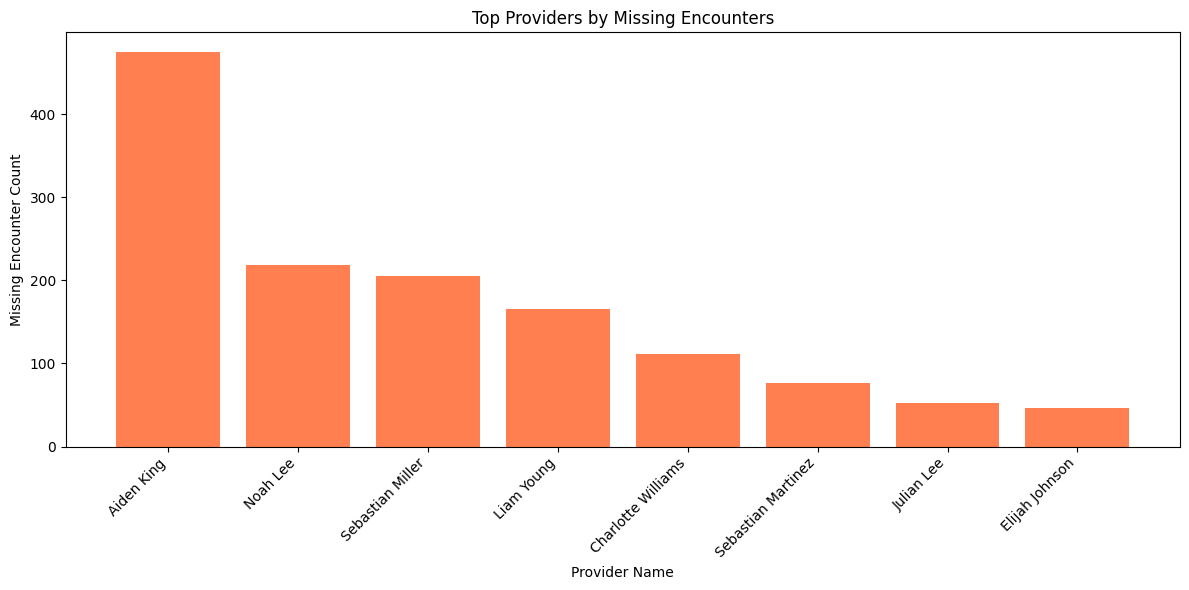

In [18]:
import matplotlib.pyplot as plt

# top providers with most missing encounters
top10 = top_missing_providers.head(10)

plt.figure(figsize=(12,6))
plt.bar(top10["Provider Name"], top10["Missing Encounter Count"], color="coral")
plt.xlabel("Provider Name")  # X-axis label
plt.ylabel("Missing Encounter Count")  # Y-axis label
plt.title("Top Providers by Missing Encounters")
plt.xticks(rotation=45, ha='right')  # Rotate provider names for readability
plt.tight_layout()
plt.show()


**Find CPT codes present in EHR but never imported in DB**

In [19]:
import re

# Step 1: Extract CPT codes from DB data (split combined strings)
def extract_cpt_codes(cpt_str):
    if pd.isna(cpt_str):
        return []
    # Remove curly braces or unwanted characters, split by comma or whitespace
    cleaned = re.sub(r"[{}]", "", cpt_str)
    # Split by comma and strip spaces
    return [code.strip() for code in cleaned.split(",") if code.strip()]

# Explode the CPT codes in DB dataset
db_cpt_series = db_df["cpt_codes"].apply(extract_cpt_codes).explode().dropna()

# Unique CPT codes in DB
db_cpt_codes = set(db_cpt_series.unique())

# Unique CPT codes in EHR
ehr_cpt_codes = set(ehr_df["CPT Code"].dropna().unique())

# Step 2: Find CPT codes in EHR never imported to DB
never_imported_cpt_codes = ehr_cpt_codes - db_cpt_codes

print(f"Total CPT codes in EHR: {len(ehr_cpt_codes)}")
print(f"Total CPT codes in DB: {len(db_cpt_codes)}")
print(f"Total CPT codes never imported: {len(never_imported_cpt_codes)}")

print("\nList of CPT codes never imported:")
for cpt in sorted(never_imported_cpt_codes):
    print(cpt)


Total CPT codes in EHR: 31
Total CPT codes in DB: 20
Total CPT codes never imported: 11

List of CPT codes never imported:
1
NORCM
SP
SP$110
SP$90
SP110
SP90
TOS
TOS115
sp120
sp90


**The comparison between imported CPT codes and missing CPT codes from EHR**  
X-axis: CPT codes (all unique codes from both datasets)

Y-axis: Count of each CPT code in EHR, DB, and the missing difference.

Three lines:

Total CPT codes recorded in EHR

CPT codes imported into DB

Missing CPT codes (EHR minus DB)


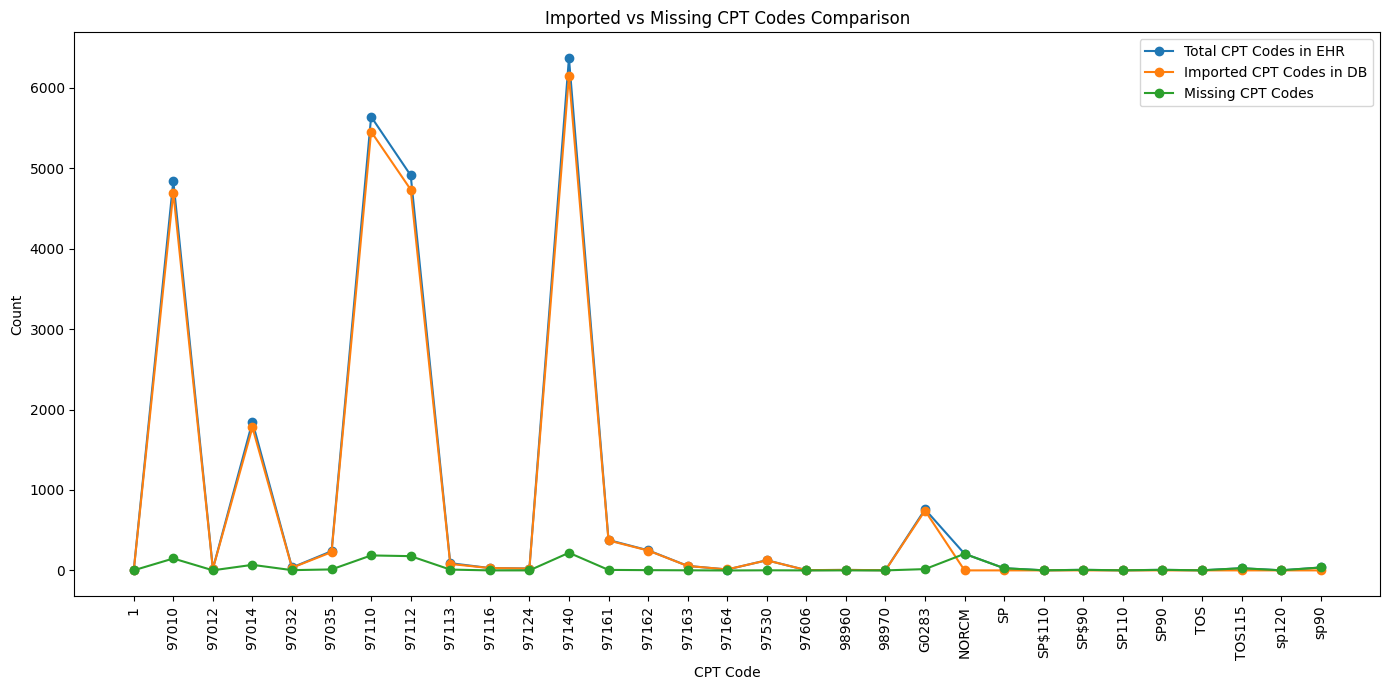

In [20]:
# Function to extract CPT codes list from DB's combined field
def extract_cpt_codes(cpt_str):
    if pd.isna(cpt_str):
        return []
    cleaned = re.sub(r"[{}]", "", cpt_str)
    return [code.strip() for code in cleaned.split(",") if code.strip()]

# Explode CPT codes from DB dataset
db_cpt_expanded = db_df["cpt_codes"].apply(extract_cpt_codes).explode().dropna()

# Count CPT code frequency in EHR
ehr_cpt_counts = ehr_df["CPT Code"].value_counts().sort_index()

# Count CPT code frequency in DB
db_cpt_counts = db_cpt_expanded.value_counts().sort_index()

# Align indexes (all CPT codes seen in either EHR or DB)
all_cpts = sorted(set(ehr_cpt_counts.index).union(set(db_cpt_counts.index)))

ehr_counts_aligned = ehr_cpt_counts.reindex(all_cpts, fill_value=0)
db_counts_aligned = db_cpt_counts.reindex(all_cpts, fill_value=0)

# Calculate missing counts (EHR - DB)
missing_counts = ehr_counts_aligned - db_counts_aligned

# Plot line graph
plt.figure(figsize=(14,7))
plt.plot(all_cpts, ehr_counts_aligned, label='Total CPT Codes in EHR', marker='o')
plt.plot(all_cpts, db_counts_aligned, label='Imported CPT Codes in DB', marker='o')
plt.plot(all_cpts, missing_counts, label='Missing CPT Codes', marker='o')

plt.xticks(rotation=90)
plt.xlabel("CPT Code")
plt.ylabel("Count")
plt.title("Imported vs Missing CPT Codes Comparison")
plt.legend()
plt.tight_layout()
plt.show()


**Imported CPT counts vs missing CPT counts by date**

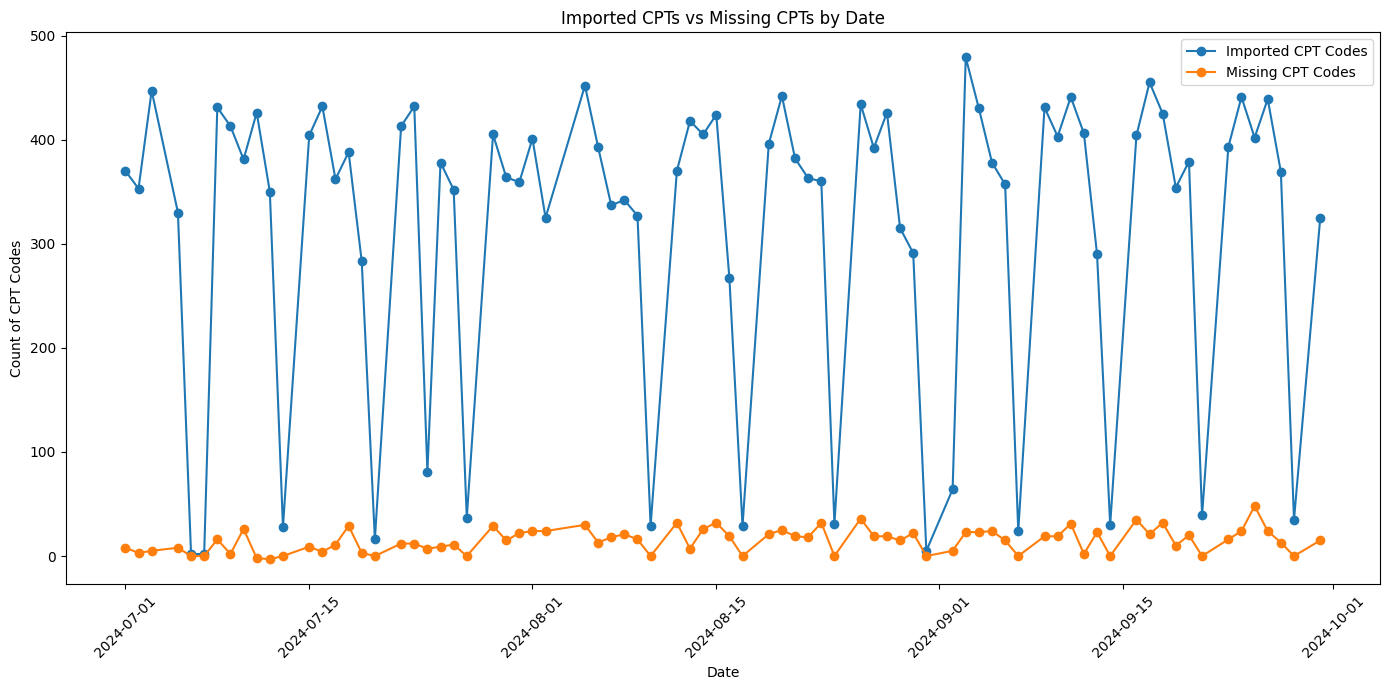

In [22]:
# Function to extract CPT codes from DB combined field
def extract_cpt_codes(cpt_str):
    if pd.isna(cpt_str):
        return []
    cleaned = re.sub(r"[{}]", "", cpt_str)
    return [code.strip() for code in cleaned.split(",") if code.strip()]

# Expand DB CPT codes so each CPT code has its own row
db_expanded = db_df.copy()
db_expanded["cpt_code"] = db_expanded["cpt_codes"].apply(extract_cpt_codes)
db_expanded = db_expanded.explode("cpt_code").dropna(subset=["cpt_code"])

# Count imported CPT codes per date in DB
db_counts_by_date = (
    db_expanded.groupby("from_date_range")["cpt_code"]
    .count()
    .rename("imported_cpt_count")
)

# Count total CPT codes per date in EHR
ehr_counts_by_date = (
    ehr_df.groupby("Date of Service")["CPT Code"]
    .count()
    .rename("total_cpt_count")
)

# Combine counts on dates (outer join)
combined = pd.concat([ehr_counts_by_date, db_counts_by_date], axis=1).fillna(0)

# Calculate missing CPT counts (total - imported)
combined["missing_cpt_count"] = combined["total_cpt_count"] - combined["imported_cpt_count"]

# Sort by date
combined = combined.sort_index()

# Plot imported vs missing CPT counts by date
plt.figure(figsize=(14,7))
plt.plot(combined.index, combined["imported_cpt_count"], label="Imported CPT Codes", marker='o')
plt.plot(combined.index, combined["missing_cpt_count"], label="Missing CPT Codes", marker='o')

plt.xlabel("Date")
plt.ylabel("Count of CPT Codes")
plt.title("Imported CPTs vs Missing CPTs by Date")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Top CPT Codes with Missing Encounters**

In [24]:
# Missing encounters per CPT Code
missing_by_cpt = (
    missing_encounters.groupby("CPT Code")
    .size()
    .sort_values(ascending=False)
    .rename("Missing Count")
)

missing_by_cpt.head(10)


,Missing Count
CPT Code,
97140,258
97110,225
NORCM,203
97112,200
97010,178
97014,101
sp90,35
SP,27
TOS115,27


**Provider + CPT Combination Missing Frequency**

In [27]:
# Group by Provider and CPT Code for missing encounters
missing_by_provider_cpt = (
    missing_encounters.groupby(["Provider Name", "CPT Code"])
    .size()
    .reset_index(name="Missing Count")
    .sort_values(by="Missing Count", ascending=False)
)

missing_by_provider_cpt.head(100)


,Provider Name,CPT Code,Missing Count
6,Aiden King,97140,84
3,Aiden King,97112,78
11,Aiden King,NORCM,78
2,Aiden King,97110,67
0,Aiden King,97010,58
...,...,...,...
60,Noah Lee,97530,1
64,Noah Lee,sp90,1
71,Sebastian Martinez,97161,1
82,Sebastian Miller,SP$110,1


**Missing Encounter Trend by Date**

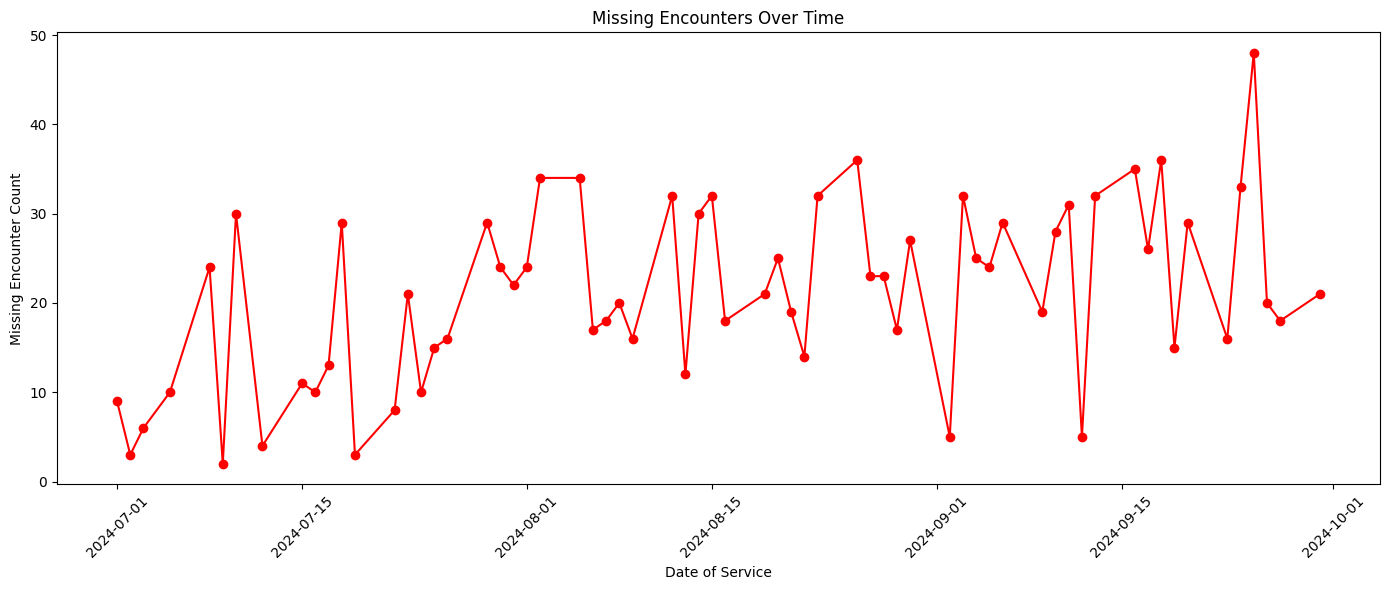

In [25]:
# Missing encounters per date
missing_by_date = (
    missing_encounters.groupby("Date of Service")
    .size()
    .sort_index()
    .rename("Missing Count")
)

# Plot it
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
plt.plot(missing_by_date.index, missing_by_date.values, marker='o', color='red')
plt.title("Missing Encounters Over Time")
plt.xlabel("Date of Service")
plt.ylabel("Missing Encounter Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Pivot to Heatmap Format**

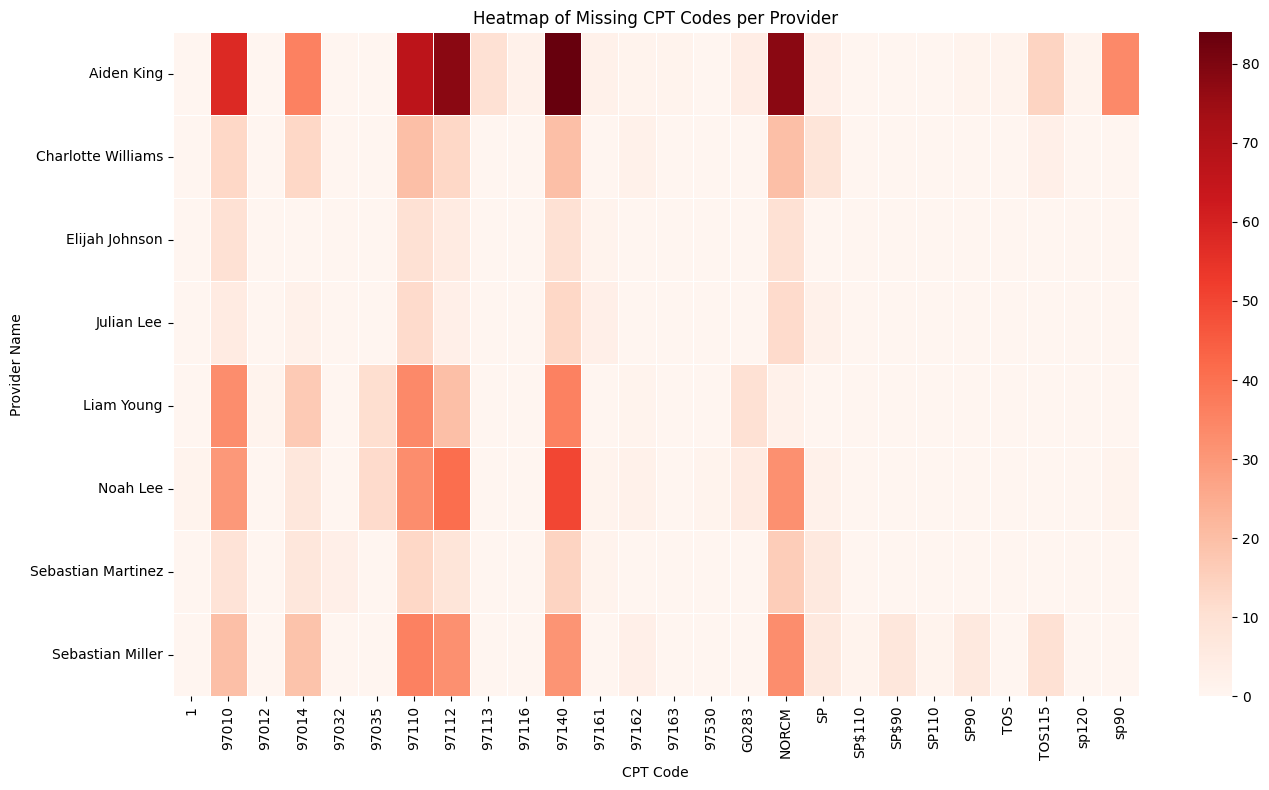

In [28]:
import seaborn as sns

# Create pivot table for heatmap
pivot = missing_by_provider_cpt.pivot(index="Provider Name", columns="CPT Code", values="Missing Count").fillna(0)

# Plot heatmap
plt.figure(figsize=(14,8))
sns.heatmap(pivot, cmap="Reds", linewidths=0.5)
plt.title("Heatmap of Missing CPT Codes per Provider")
plt.xlabel("CPT Code")
plt.ylabel("Provider Name")
plt.tight_layout()
plt.show()
